Optimization problems:

- n-queens
- k-color

In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval
# import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator
from mlrose_hiive import SARunner, GARunner, NNGSRunner, RHCRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

C:\Users\aamir\AppData\Local\Temp\ipykernel_4420\4211111341.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


In [14]:
# queens 4, with rhc
problem = QueensGenerator().generate(seed=42, size=4)

rhc = RHCRunner(
    problem=problem,
    experiment_name='queens4_rhc',
    seed=42,
    iteration_list=2 ** np.arange(4),
    restart_list=[5,10,15],
    max_attempts=20
)

df_run_stats, df_run_curves = rhc.run()

best_fitness = df_run_stats['Fitness'].min()
print(f"Best fitness = {best_fitness}")

# Rows having best fitness
display(df_run_stats.query('Fitness == @best_fitness'))

# best fitness for restarts == 5
print(f"Best fitness for restarts == 5 -> {df_run_stats.query('Restarts == 5')['Fitness'].min()}")

# Plot curve for restarts == 10 and restarts == 15


Best fitness = 0.0


,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
82,2,0.0,101,0.067254,"[1, 3, 0, 2]",10,8,10
83,4,0.0,101,0.067254,"[1, 3, 0, 2]",10,8,10
84,8,0.0,101,0.067254,"[1, 3, 0, 2]",10,8,10
137,2,0.0,101,0.365564,"[1, 3, 0, 2]",15,8,10
138,4,0.0,101,0.365564,"[1, 3, 0, 2]",15,8,10
139,8,0.0,101,0.365564,"[1, 3, 0, 2]",15,8,10


Best fitness for restarts == 5 -> 1.0


In [15]:
# To change to maximization problem
df_run_curves['Fitness'] = -1*df_run_curves['Fitness']

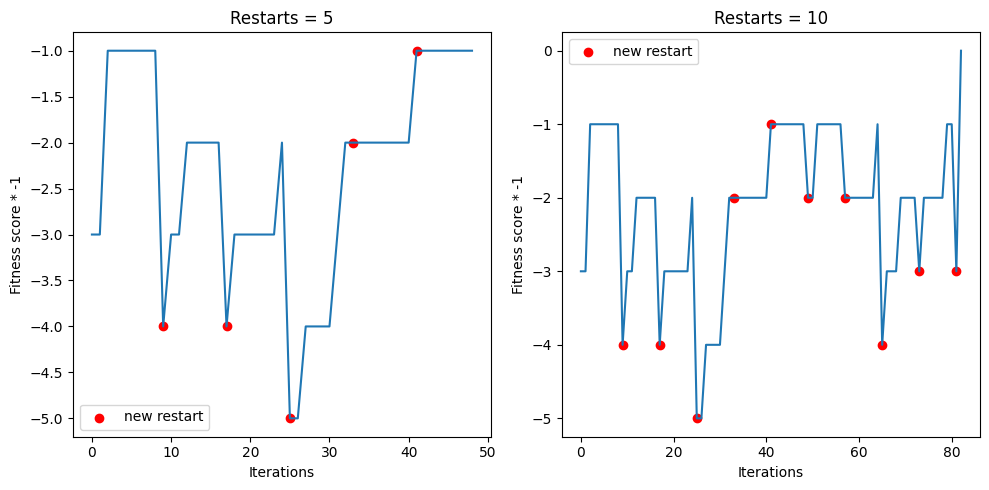

In [17]:
curve_10_restarts = df_run_curves.query('Restarts == 5').reset_index(drop=True)
starting_points_index = curve_10_restarts['current_restart'].drop_duplicates().index

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

starting_points = curve_10_restarts.loc[starting_points_index, 'Fitness']
fitness_curve = curve_10_restarts['Fitness']
ax1.plot(fitness_curve)
ax1.scatter(starting_points.index[1:], starting_points[1:], color='r', label='new restart')
ax1.set_title('Restarts = 5')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Fitness score * -1')
ax1.legend(loc='best')

curve_10_restarts = df_run_curves.query('Restarts == 10').reset_index(drop=True)
starting_points_index = curve_10_restarts['current_restart'].drop_duplicates().index

starting_points = curve_10_restarts.loc[starting_points_index, 'Fitness']
fitness_curve = curve_10_restarts['Fitness']
ax2.plot(fitness_curve)
ax2.scatter(starting_points.index[1:], starting_points[1:], color='r', label='new restart')
ax2.set_title('Restarts = 10')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Fitness score * -1')
ax2.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

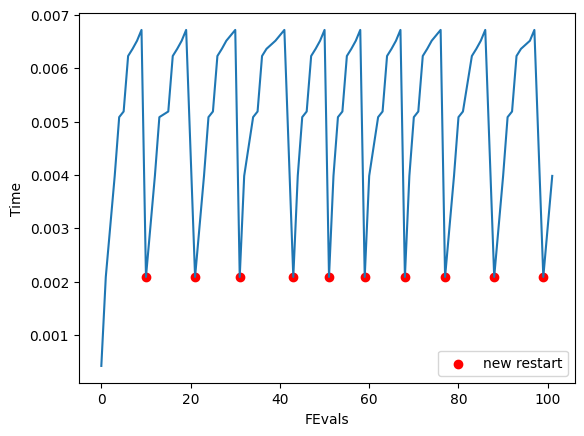

In [240]:
plt.figure()
curve_10_restarts = df_run_curves.query('Restarts == 10')
starting_points_index = curve_10_restarts['current_restart'].drop_duplicates().index
x_scatter = curve_10_restarts.loc[starting_points_index, 'FEvals']
y_scatter = curve_10_restarts.loc[starting_points_index, 'Time']
starting_points = curve_10_restarts.loc[starting_points_index, 'Time']
plt.scatter(x_scatter[1:], y_scatter[1:], color='r', label='new restart') # 1: is to avoid starting point
plt.plot(curve_10_restarts['FEvals'], curve_10_restarts['Time'])
plt.ylabel('Time')
plt.xlabel('FEvals')
plt.legend(loc='best')
plt.show()

Could get to fitness == 1 with 5 restarts. But could get 0 with 10 and 15 restarts.

In [6]:
# queens 8, with rhc
problem = QueensGenerator().generate(seed=42, size=8)

rhc = RHCRunner(
    problem=problem,
    experiment_name='queens8_rhc',
    seed=42,
    iteration_list=2 ** np.arange(8),
    restart_list=[5,10,15],
    max_attempts=20
)

df_run_stats, df_run_curves = rhc.run()

best_fitness = df_run_stats['Fitness'].min()
print(f"Best fitness = {best_fitness}")

# Rows having best fitness
display(df_run_stats.query('Fitness == @best_fitness'))

# best fitness for restarts == 5
print(f"Best fitness for restarts == 5 -> {df_run_stats.query('Restarts == 5')['Fitness'].min()}")

# Plot curve for restarts == 10 and restarts == 15


Best fitness = 0.0


,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
113,16,0.0,229,0.203610,"[6, 2, 7, 1, 4, 0, 5, 3]",10,128,6
114,32,0.0,229,0.203610,"[6, 2, 7, 1, 4, 0, 5, 3]",10,128,6
115,64,0.0,229,0.203610,"[6, 2, 7, 1, 4, 0, 5, 3]",10,128,6
116,128,0.0,229,0.203610,"[6, 2, 7, 1, 4, 0, 5, 3]",10,128,6
176,16,0.0,229,0.245467,"[6, 2, 7, 1, 4, 0, 5, 3]",15,128,6
177,32,0.0,229,0.245467,"[6, 2, 7, 1, 4, 0, 5, 3]",15,128,6
178,64,0.0,229,0.245467,"[6, 2, 7, 1, 4, 0, 5, 3]",15,128,6
179,128,0.0,229,0.245467,"[6, 2, 7, 1, 4, 0, 5, 3]",15,128,6


Best fitness for restarts == 5 -> 1.0


In [7]:
# Changing to maximization problem
df_run_curves['Fitness'] = df_run_curves['Fitness'] * -1

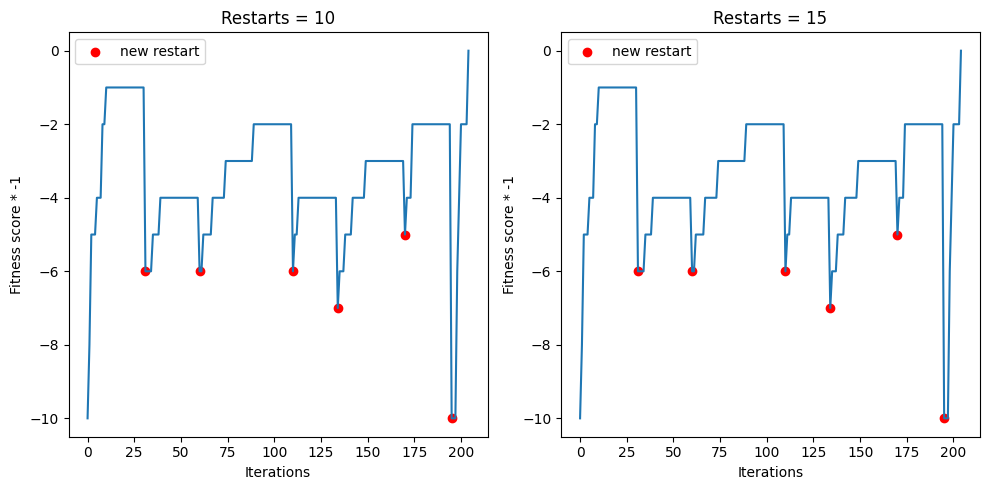

In [10]:
curve_10_restarts = df_run_curves.query('Restarts == 10').reset_index(drop=True)
starting_points_index = curve_10_restarts['current_restart'].drop_duplicates().index

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

starting_points = curve_10_restarts.loc[starting_points_index, 'Fitness']
fitness_curve = curve_10_restarts['Fitness']
ax1.plot(fitness_curve)
ax1.scatter(starting_points.index[1:], starting_points[1:], color='r', label='new restart')
ax1.set_title('Restarts = 10')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Fitness score * -1')
ax1.legend(loc='best')

curve_10_restarts = df_run_curves.query('Restarts == 15').reset_index(drop=True)
starting_points_index = curve_10_restarts['current_restart'].drop_duplicates().index

starting_points = curve_10_restarts.loc[starting_points_index, 'Fitness']
fitness_curve = curve_10_restarts['Fitness']
ax2.plot(fitness_curve)
ax2.scatter(starting_points.index[1:], starting_points[1:], color='r', label='new restart')
ax2.set_title('Restarts = 15')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Fitness score * -1')
ax2.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [222]:
curve_10_restarts

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
400,0,0.000561,10.0,0.0,15,128,0
401,1,0.003035,8.0,2.0,15,128,0
402,2,0.005148,5.0,4.0,15,128,0
403,3,0.006530,5.0,5.0,15,128,0
404,4,0.007012,5.0,6.0,15,128,0
...,...,...,...,...,...,...,...
600,6,0.009330,2.0,224.0,15,128,6
601,7,0.009563,2.0,225.0,15,128,6
602,8,0.010001,2.0,226.0,15,128,6
603,9,0.013054,2.0,227.0,15,128,6


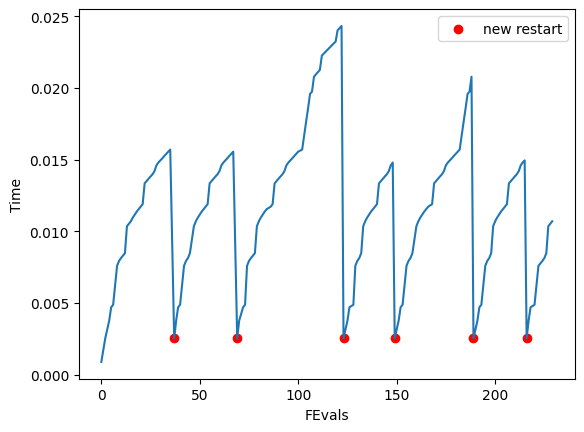

In [237]:
plt.figure()
curve_10_restarts = df_run_curves.query('Restarts == 10')
starting_points_index = curve_10_restarts['current_restart'].drop_duplicates().index
x_scatter = curve_10_restarts.loc[starting_points_index, 'FEvals']
y_scatter = curve_10_restarts.loc[starting_points_index, 'Time']
starting_points = curve_10_restarts.loc[starting_points_index, 'Time']
plt.scatter(x_scatter[1:], y_scatter[1:], color='r', label='new restart') # 1: is to avoid starting point
plt.plot(curve_10_restarts['FEvals'], curve_10_restarts['Time'])
plt.ylabel('Time')
plt.xlabel('FEvals')
plt.legend(loc='best')
plt.show()

## Start of SA

In [292]:
# queens 4, with sa
problem = QueensGenerator().generate(seed=42, size=4)

sa_geo = SARunner(
    problem=problem,
    experiment_name='queens4_sa',
    iteration_list=2 ** np.arange(7),
    temperature_list=[0.5,1,2],
    decay_list=[mlrose_hiive.GeomDecay],
    seed=42
)

sa_exp = SARunner(
    problem=problem,
    experiment_name='queens4_sa',
    iteration_list=2 ** np.arange(7),
    temperature_list=[0.5,1,2],
    decay_list=[mlrose_hiive.ExpDecay],
    seed=42
)

df_run_stats, df_run_curves = sa_geo.run()

best_fitness = df_run_stats['Fitness'].min()
print(f"Best fitness = {best_fitness}")

# Rows having best fitness
display(df_run_stats.query('Fitness == @best_fitness'))


Best fitness = 0.0


,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
7,64,0.0,53,0.022606,"[np.int32(2), np.int32(0), np.int32(3), np.int...",geometric,0.5,0.99,0.001,0.499886,0.5,64
15,64,0.0,61,0.014113,"[np.int32(1), np.int32(3), np.int32(0), np.int...",geometric,1.0,0.99,0.001,0.999858,1,64


We could get 0 fitness for (geometric, exponential) for initial temp = (0.5,1)

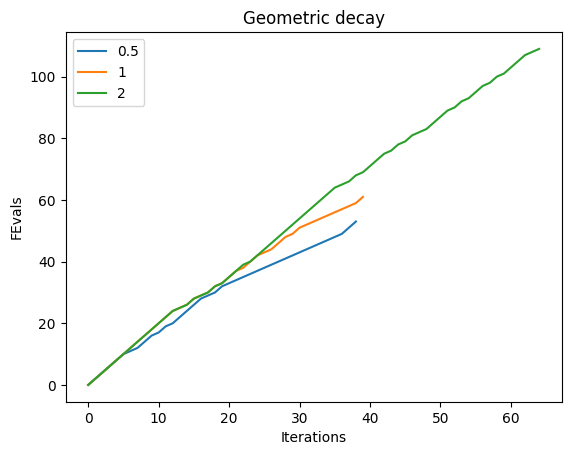

In [309]:
plt.figure()
for temp in df_run_curves['Temperature'].drop_duplicates():
    curr = df_run_curves.query('Temperature == @temp').reset_index(drop=True)
    # display(curr)
    plt.plot(curr.index, curr['FEvals'], label=f"{temp}")
plt.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('Geometric decay')
plt.show()


Best fitness = 0.0


,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters
7,64,0.0,79,0.022916,"[np.int32(2), np.int32(0), np.int32(3), np.int...",exponential,0.5,0.005,0.001,0.499943,0.5,64
15,64,0.0,73,0.015365,"[np.int32(2), np.int32(0), np.int32(3), np.int...",exponential,1.0,0.005,0.001,0.999923,1,64


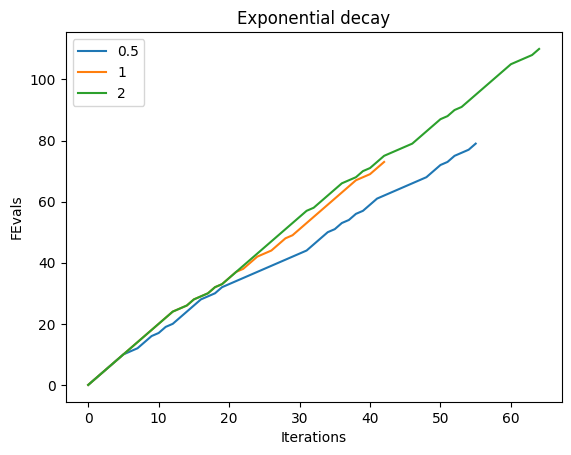

In [310]:
df_run_stats, df_run_curves = sa_exp.run()

best_fitness = df_run_stats['Fitness'].min()
print(f"Best fitness = {best_fitness}")

# Rows having best fitness
display(df_run_stats.query('Fitness == @best_fitness'))

plt.figure()
for temp in df_run_curves['Temperature'].drop_duplicates():
    curr = df_run_curves.query('Temperature == @temp').reset_index(drop=True)
    # display(curr)
    plt.plot(curr.index, curr['FEvals'], label=f"{temp}")
plt.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('Exponential decay')
plt.show()


Best fitness = 0.0


,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_decay,schedule_min_temp,schedule_current_value,Temperature,max_iters
10,512,0.0,298,0.070717,"[np.int32(1), np.int32(4), np.int32(6), np.int...",geometric,0.5,0.99,0.001,0.499645,0.5,512
20,256,0.0,285,0.071173,"[np.int32(5), np.int32(1), np.int32(6), np.int...",geometric,1.0,0.99,0.001,0.999285,1,512
21,512,0.0,285,0.071173,"[np.int32(5), np.int32(1), np.int32(6), np.int...",geometric,1.0,0.99,0.001,0.999285,1,512
32,512,0.0,452,0.086853,"[np.int32(4), np.int32(1), np.int32(3), np.int...",geometric,2.0,0.99,0.001,1.998255,2,512


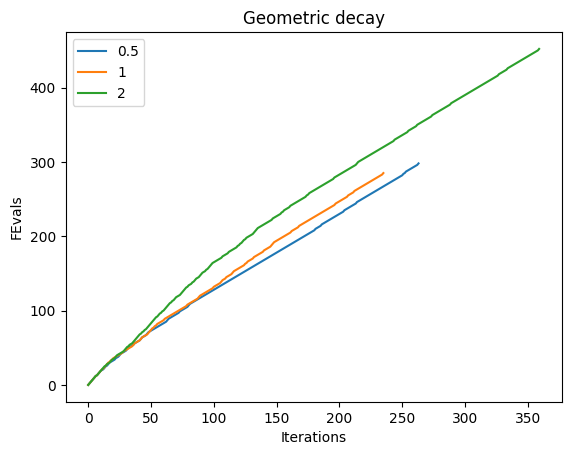

Best fitness = 0.0


,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters
10,512,0.0,298,0.061562,"[np.int32(1), np.int32(4), np.int32(6), np.int...",exponential,0.5,0.005,0.001,0.499846,0.5,512


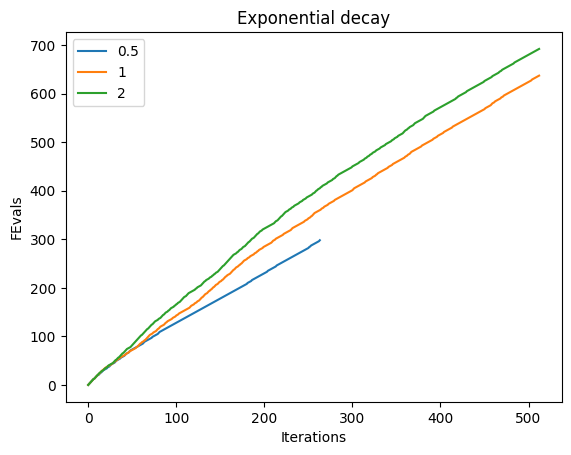

In [312]:
# queens 8, with sa
problem = QueensGenerator().generate(seed=42, size=8)

sa_geo = SARunner(
    problem=problem,
    experiment_name='queens8_sa',
    iteration_list=2 ** np.arange(10),
    temperature_list=[0.5,1,2],
    decay_list=[mlrose_hiive.GeomDecay],
    seed=42
)

sa_exp = SARunner(
    problem=problem,
    experiment_name='queens8_sa',
    iteration_list=2 ** np.arange(10),
    temperature_list=[0.5,1,2],
    decay_list=[mlrose_hiive.ExpDecay],
    seed=42
)

df_run_stats, df_run_curves = sa_geo.run()

best_fitness = df_run_stats['Fitness'].min()
print(f"Best fitness = {best_fitness}")

# Rows having best fitness
display(df_run_stats.query('Fitness == @best_fitness'))

# Plot 1
plt.figure()
for temp in df_run_curves['Temperature'].drop_duplicates():
    curr = df_run_curves.query('Temperature == @temp').reset_index(drop=True)
    # display(curr)
    plt.plot(curr.index, curr['FEvals'], label=f"{temp}")
plt.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('Geometric decay')
plt.show()

# Plot 2
df_run_stats, df_run_curves = sa_exp.run()

best_fitness = df_run_stats['Fitness'].min()
print(f"Best fitness = {best_fitness}")

# Rows having best fitness
display(df_run_stats.query('Fitness == @best_fitness'))

plt.figure()
for temp in df_run_curves['Temperature'].drop_duplicates():
    curr = df_run_curves.query('Temperature == @temp').reset_index(drop=True)
    # display(curr)
    plt.plot(curr.index, curr['FEvals'], label=f"{temp}")
plt.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('Exponential decay')
plt.show()



## Start of ga

In [342]:
# queens 4, with ga
problem = QueensGenerator().generate(seed=42, size=4)

ga = GARunner(
    problem=problem,
    experiment_name='queens4_ga',
    seed=42,
    iteration_list= 2 ** np.arange(6),
    population_sizes=[10,20,50],
    mutation_rates=[0.05,0.1]
)

df_run_stats, df_run_curves = ga.run()

best_fitness = df_run_stats['Fitness'].min()
print(f"Best fitness = {best_fitness}")

# Rows having best fitness
display(df_run_stats.query('Fitness == @best_fitness').head())

Best fitness = 0.0


,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
25,8,0.0,190,0.021675,"[np.int32(1), np.int32(3), np.int32(0), np.int...",20,0.10,32
26,16,0.0,190,0.021675,"[np.int32(1), np.int32(3), np.int32(0), np.int...",20,0.10,32
27,32,0.0,190,0.021675,"[np.int32(1), np.int32(3), np.int32(0), np.int...",20,0.10,32
29,1,0.0,102,0.009711,"[np.int32(1), np.int32(3), np.int32(0), np.int...",50,0.05,32
30,2,0.0,102,0.009711,"[np.int32(1), np.int32(3), np.int32(0), np.int...",50,0.05,32
31,4,0.0,102,0.009711,"[np.int32(1), np.int32(3), np.int32(0), np.int...",50,0.05,32
32,8,0.0,102,0.009711,"[np.int32(1), np.int32(3), np.int32(0), np.int...",50,0.05,32
33,16,0.0,102,0.009711,"[np.int32(1), np.int32(3), np.int32(0), np.int...",50,0.05,32
34,32,0.0,102,0.009711,"[np.int32(1), np.int32(3), np.int32(0), np.int...",50,0.05,32
36,1,0.0,102,0.009109,"[np.int32(1), np.int32(3), np.int32(0), np.int...",50,0.10,32


In [320]:
df_run_stats.query('Fitness == @best_fitness')[['Population Size', 'Mutation Rate']].drop_duplicates()

,Population Size,Mutation Rate
25,20,0.10
29,50,0.05
36,50,0.10


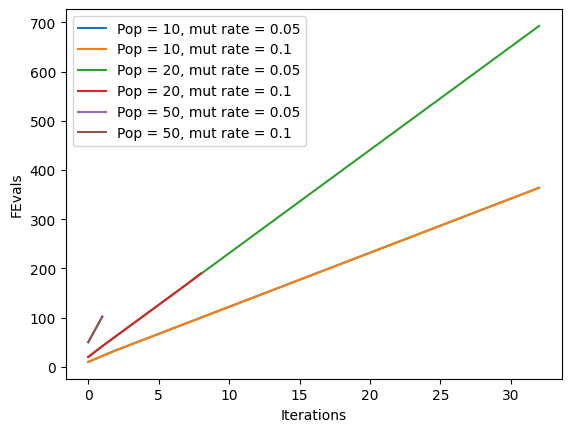

In [334]:
plt.figure()
for pop in [10,20,50]:
    for mut in [0.05,0.1]:
        curr = df_run_curves.loc[(df_run_curves['Mutation Rate'] == mut) & (df_run_curves['Population Size'] == pop)].reset_index(drop=True)
        # display(curr)
        plt.plot(curr['Iteration'], curr['FEvals'], label=f"Pop = {pop}, mut rate = {mut}")
plt.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.show()

In [337]:
# queens 8, with ga
problem = QueensGenerator().generate(seed=42, size=8)

ga = GARunner(
    problem=problem,
    experiment_name='queens8_ga',
    seed=42,
    iteration_list= 2 ** np.arange(10),
    population_sizes=[50,100,200],
    mutation_rates=[0.1,0.2]
)

df_run_stats, df_run_curves = ga.run()

best_fitness = df_run_stats['Fitness'].min()
print(f"Best fitness = {best_fitness}")

# Rows having best fitness
display(df_run_stats.query('Fitness == @best_fitness').head())

Best fitness = 0.0


,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
19,128,0.0,5816,0.809863,"[np.int32(1), np.int32(5), np.int32(7), np.int...",50,0.2,512
20,256,0.0,5816,0.809863,"[np.int32(1), np.int32(5), np.int32(7), np.int...",50,0.2,512
21,512,0.0,5816,0.809863,"[np.int32(1), np.int32(5), np.int32(7), np.int...",50,0.2,512
31,256,0.0,16769,2.386969,"[np.int32(3), np.int32(5), np.int32(7), np.int...",100,0.1,512
32,512,0.0,16769,2.386969,"[np.int32(3), np.int32(5), np.int32(7), np.int...",100,0.1,512


In [338]:
df_run_stats.query('Fitness == @best_fitness')[['Population Size', 'Mutation Rate']].drop_duplicates()

,Population Size,Mutation Rate
19,50,0.2
31,100,0.1
49,200,0.1
64,200,0.2


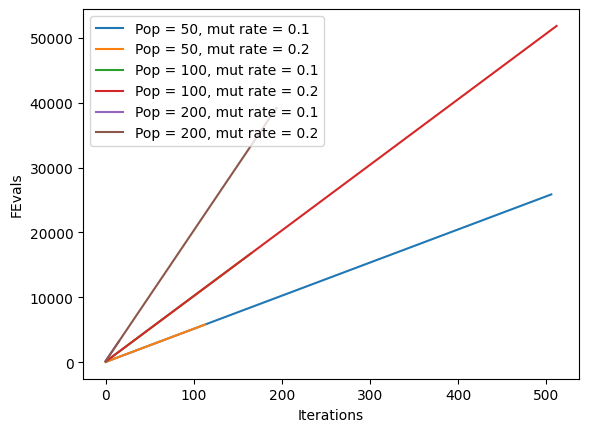

In [340]:
plt.figure()
for pop in [50,100,200]:
    for mut in [0.1, 0.2]:
        curr = df_run_curves.loc[(df_run_curves['Mutation Rate'] == mut) & (df_run_curves['Population Size'] == pop)].reset_index(drop=True)
        # display(curr)
        plt.plot(curr['Iteration'], curr['FEvals'], label=f"Pop = {pop}, mut rate = {mut}")
plt.legend(loc='best')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.show()

## Compare

In [343]:
# Compare for 4 queens
problem = QueensGenerator().generate(seed=42, size=4)

rhc = RHCRunner(
    problem=problem,
    experiment_name='queens4_rhc',
    seed=42,
    iteration_list=2 ** np.arange(4),
    restart_list=[10],
    max_attempts=20
)

sa_geo = SARunner(
    problem=problem,
    experiment_name='queens4_sa',
    iteration_list=2 ** np.arange(7),
    temperature_list=[0.5],
    decay_list=[mlrose_hiive.GeomDecay],
    seed=42
)

ga = GARunner(
    problem=problem,
    experiment_name='queens4_ga',
    seed=42,
    iteration_list= 2 ** np.arange(6),
    population_sizes=[50],
    mutation_rates=[0.05]
)

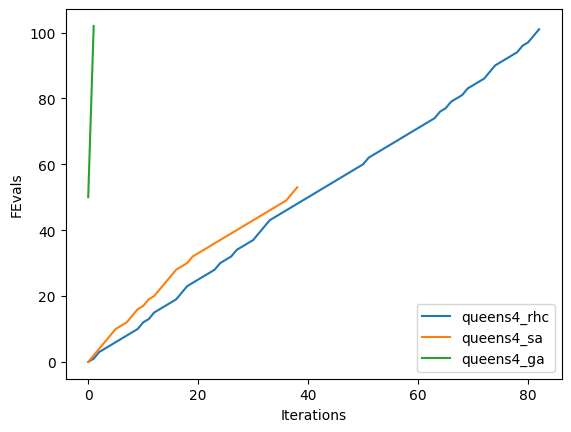

In [351]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.figure()

for alg in [rhc, sa_geo, ga]:

    df_run_stats, df_run_curves = alg.run()

    # display(df_run_curves)
    
    plt.plot(df_run_curves.index, df_run_curves['FEvals'], label=alg._experiment_name)

plt.ylabel('FEvals')
plt.xlabel('Iterations')
plt.legend(loc='best')
plt.show()

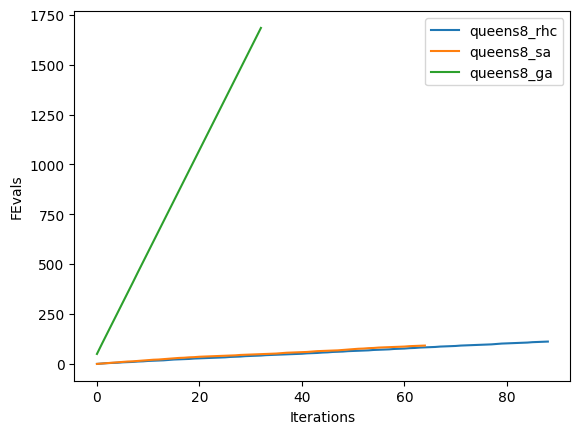

In [3]:
# Compare for 8 queens
problem = QueensGenerator().generate(seed=42, size=8)

rhc = RHCRunner(
    problem=problem,
    experiment_name='queens8_rhc',
    seed=42,
    iteration_list=2 ** np.arange(4),
    restart_list=[10],
    max_attempts=20
)

sa_geo = SARunner(
    problem=problem,
    experiment_name='queens8_sa',
    iteration_list=2 ** np.arange(7),
    temperature_list=[1],
    decay_list=[mlrose_hiive.GeomDecay],
    seed=42
)

ga = GARunner(
    problem=problem,
    experiment_name='queens8_ga',
    seed=42,
    iteration_list= 2 ** np.arange(6),
    population_sizes=[50],
    mutation_rates=[0.2]
)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.figure()

for alg in [rhc, sa_geo, ga]:

    df_run_stats, df_run_curves = alg.run()

    # display(df_run_curves)
    
    plt.plot(df_run_curves.index, df_run_curves['FEvals'], label=alg._experiment_name)

plt.ylabel('FEvals')
plt.xlabel('Iterations')
plt.legend(loc='best')
plt.show()

In [359]:
rhc = RHCRunner(
    problem=problem,
    experiment_name='queens4_rhc',
    seed=42,
    iteration_list=2 ** np.arange(4),
    restart_list=[10],
    max_attempts=20
)

df_run_stats, df_run_curves = rhc.run()

maxes = df_run_curves['current_restart'].drop_duplicates()[1:].index - 1
df_run_curves['current_restart'].drop_duplicates()


0      0
9      1
17     2
25     3
33     4
41     5
49     6
57     7
65     8
73     9
81    10
Name: current_restart, dtype: int64

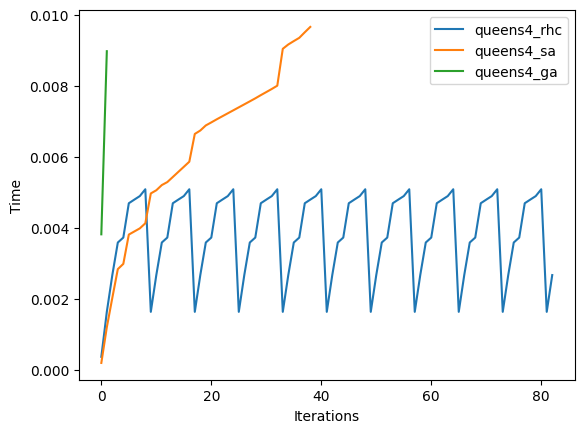

In [353]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.figure()

for alg in [rhc, sa_geo, ga]:

    df_run_stats, df_run_curves = alg.run()

    # display(df_run_curves)
    
    plt.plot(df_run_curves.index, df_run_curves['Time'], label=alg._experiment_name)

plt.ylabel('Time')
plt.xlabel('Iterations')
plt.legend(loc='best')
plt.show()